### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['NAME', 'EIN'])

In [3]:
# Determine the number of unique values in each column
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
application_df["APPLICATION_TYPE"]

0        T10
1         T3
2         T5
3         T3
4         T3
        ... 
34294     T4
34295     T4
34296     T3
34297     T5
34298     T3
Name: APPLICATION_TYPE, Length: 34299, dtype: object

In [5]:
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_types = application_df.APPLICATION_TYPE.value_counts()

<AxesSubplot:ylabel='Density'>

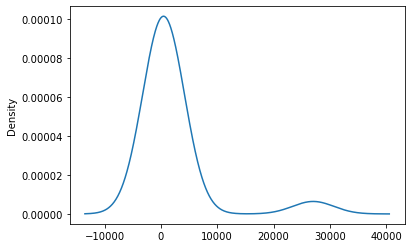

In [7]:
# Visualize the value counts of APPLICATION_TYPE
app_types.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_types[app_types < 500 ].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classtypes = application_df.CLASSIFICATION.value_counts()

<AxesSubplot:ylabel='Density'>

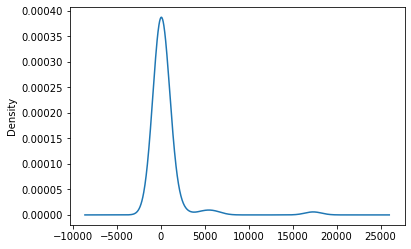

In [10]:
# Visualize the value counts of CLASSIFICATION
classtypes.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classtypes[classtypes < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [13]:
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list

# success = pd.DataFrame(enc.fit_transform(application_df.IS_SUCCESSFUL.values.reshape(-1,1)))
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.columns

Index(['APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'I

In [16]:
# Merge one-hot encoded features and drop the originals
# application_df = application_df.append(success, ignore_index=True)
application_df = application_df.merge(encode_df,left_index=True, right_index=True)

application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

X


array([[1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [18]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  232
hidden_nodes_layer2 = 116
hidden_nodes_layer3 = 60


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="linear")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="linear"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="linear"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 232)               10208     
                                                                 
 dense_1 (Dense)             (None, 116)               27028     
                                                                 
 dense_2 (Dense)             (None, 60)                7020      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 44,317
Trainable params: 44,317
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Create a callback that saves the model's weights every epoch
steps_per_execution=4000

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= steps_per_execution,
    )


In [24]:
# Train the model

fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.6049 - accuracy: 0.7100
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5892 - accuracy: 0.7170
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5857 - accuracy: 0.7180
Epoch 4/100
804/804 [==============================] - 1s 997us/step - loss: 0.5837 - accuracy: 0.7189
Epoch 5/100
759/804 [===========================>..] - ETA: 0s - loss: 0.5837 - accuracy: 0.7164
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5831 - accuracy: 0.7174
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5818 - accuracy: 0.7180
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5809 - accuracy: 0.7187
Epoch 8/100
804/804 [==============================] - 1s 990us/step - loss: 0.5802 - accuracy: 0.7194
Epoch 9/100
804/804 [=========================

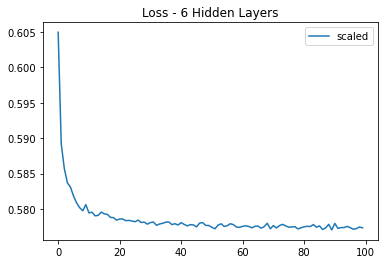

In [25]:

plt.plot(fit_model.history["loss"])
plt.title("Loss - 6 Hidden Layers")
plt.legend(["scaled"])


In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5797 - accuracy: 0.7193 - 321ms/epoch - 1ms/step
Loss: 0.5797430872917175, Accuracy: 0.7193002700805664


In [27]:
# # # Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Attempt1.h5")

In [28]:
# # Create a DataFrame containing training history
# history_model = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# # Plot the loss
# history_model.plot(y="loss")

In [29]:
# # Plot the accuracy
# history_model.plot(y="accuracy")

In [30]:
# # Import the model to a new object
# nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [31]:
# # Evaluate the completed model using the test data
# model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")